In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
hdb = pd.read_csv('./archive/hdb.csv')

In [15]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 826581 non-null  int64  
 1   month                826581 non-null  int64  
 2   town                 826581 non-null  object 
 3   flat_type            826581 non-null  object 
 4   block                826581 non-null  object 
 5   street_name          826581 non-null  object 
 6   storey_range         826581 non-null  object 
 7   floor_area_sqm       826581 non-null  float64
 8   flat_model           826581 non-null  object 
 9   lease_commence_date  826581 non-null  int64  
 10  resale_price         826581 non-null  float64
 11  remaining_lease      826581 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 75.7+ MB


In [4]:
hdb.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [5]:
hdb["town"].value_counts()

TAMPINES           73101
YISHUN             63309
BEDOK              61400
JURONG WEST        60708
WOODLANDS          58735
ANG MO KIO         48237
HOUGANG            45476
BUKIT BATOK        40444
CHOA CHU KANG      33388
BUKIT MERAH        30518
PASIR RIS          30267
TOA PAYOH          28525
QUEENSTOWN         25922
CLEMENTI           25755
GEYLANG            25679
BUKIT PANJANG      24241
KALLANG/WHAMPOA    24030
SENGKANG           23903
JURONG EAST        22864
SERANGOON          21125
BISHAN             19522
PUNGGOL            12336
SEMBAWANG          11016
MARINE PARADE       7388
CENTRAL AREA        6345
BUKIT TIMAH         2283
LIM CHU KANG          64
Name: town, dtype: int64

In [6]:
hdb["flat_type"].value_counts()

4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       223
Name: flat_type, dtype: int64

In [7]:
hdb.groupby(["town", "flat_type"]).size().sort_values(ascending=False)

town           flat_type
ANG MO KIO     3 ROOM       30757
YISHUN         4 ROOM       30201
TAMPINES       4 ROOM       29850
BEDOK          3 ROOM       28443
WOODLANDS      4 ROOM       26972
                            ...  
HOUGANG        2 ROOM          35
LIM CHU KANG   4 ROOM          18
MARINE PARADE  2 ROOM           8
BUKIT MERAH    EXECUTIVE        5
CENTRAL AREA   EXECUTIVE        2
Length: 136, dtype: int64

In [8]:
def town_boxplot(df):
    index_sort = df.groupby("town").median().sort_values('resale_price').index
    df.town=pd.Categorical(df.town,categories=list(index_sort))
    df.sort_values('town')
    f = plt.figure(figsize=(40, 20))
    sb.boxplot(x='town', y='resale_price', data=df)
    print(df[['town', 'resale_price']].groupby('town').median().sort_values('resale_price'))

In [17]:
hdb["flat_type"].value_counts()

4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       223
Name: flat_type, dtype: int64

In [18]:
town_block = hdb.groupby(["town", "block", "flat_type", "street_name", "floor_area_sqm", "lease_commence_date"]).size().sort_values(ascending=False)

In [82]:
town_block

town             block  flat_type  street_name        floor_area_sqm  lease_commence_date
JURONG WEST      211    3 ROOM     BOON LAY PL        65.0            1976                   667
                 186    3 ROOM     BOON LAY AVE       59.0            1975                   618
                 185    3 ROOM     BOON LAY AVE       59.0            1975                   615
                 208    3 ROOM     BOON LAY PL        65.0            1976                   613
                 210    3 ROOM     BOON LAY PL        65.0            1977                   612
                                                                                            ... 
                 327    4 ROOM     TAH CHING RD       107.0           1997                     1
                 326    5 ROOM     TAH CHING RD       119.0           1997                     1
                 321    5 ROOM     TAH CHING RD       119.0           1997                     1
                 272A   5 ROOM     JU

In [73]:
town_block = hdb.groupby(["town", "block", "flat_type", "street_name", "floor_area_sqm"]).size().sort_values(ascending=False)

In [74]:
town_block

town             block  flat_type  street_name        floor_area_sqm
JURONG WEST      211    3 ROOM     BOON LAY PL        65.0              667
                 186    3 ROOM     BOON LAY AVE       59.0              618
                 185    3 ROOM     BOON LAY AVE       59.0              615
                 208    3 ROOM     BOON LAY PL        65.0              613
                 210    3 ROOM     BOON LAY PL        65.0              612
                                                                       ... 
                 327    4 ROOM     TAH CHING RD       107.0               1
                 326    5 ROOM     TAH CHING RD       119.0               1
                 321    5 ROOM     TAH CHING RD       119.0               1
                 272A   5 ROOM     JURONG WEST ST 24  115.0               1
KALLANG/WHAMPOA  1      3 ROOM     BEACH RD           62.0                1
Length: 36380, dtype: int64

In [87]:
hdb["town"].value_counts()

TAMPINES           73101
YISHUN             63309
BEDOK              61400
JURONG WEST        60708
WOODLANDS          58735
ANG MO KIO         48237
HOUGANG            45476
BUKIT BATOK        40444
CHOA CHU KANG      33388
BUKIT MERAH        30518
PASIR RIS          30267
TOA PAYOH          28525
QUEENSTOWN         25922
CLEMENTI           25755
GEYLANG            25679
BUKIT PANJANG      24241
KALLANG/WHAMPOA    24030
SENGKANG           23903
JURONG EAST        22864
SERANGOON          21125
BISHAN             19522
PUNGGOL            12336
SEMBAWANG          11016
MARINE PARADE       7388
CENTRAL AREA        6345
BUKIT TIMAH         2283
LIM CHU KANG          64
Name: town, dtype: int64

In [22]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           826581 non-null  int64  
 1   month                826581 non-null  object 
 2   town                 826581 non-null  object 
 3   flat_type            826581 non-null  object 
 4   block                826581 non-null  object 
 5   street_name          826581 non-null  object 
 6   storey_range         826581 non-null  object 
 7   floor_area_sqm       826581 non-null  float64
 8   flat_model           826581 non-null  object 
 9   lease_commence_date  826581 non-null  int64  
 10  remaining_lease      117527 non-null  object 
 11  resale_price         826581 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 75.7+ MB


In [23]:
a = pd.to_datetime(hdb['month'])

In [30]:
a[43200]

Timestamp('2017-05-01 00:00:00')

In [31]:
hdb.month[43200]

'2017-05'

In [35]:
hdb['month'] = pd.to_datetime(hdb['month'])
hdb

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
826576,826576,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,NaN,580000.0
826577,826577,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,NaN,540000.0
826578,826578,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,NaN,738000.0
826579,826579,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,NaN,592000.0


In [36]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           826581 non-null  int64         
 1   month                826581 non-null  datetime64[ns]
 2   town                 826581 non-null  object        
 3   flat_type            826581 non-null  object        
 4   block                826581 non-null  object        
 5   street_name          826581 non-null  object        
 6   storey_range         826581 non-null  object        
 7   floor_area_sqm       826581 non-null  float64       
 8   flat_model           826581 non-null  object        
 9   lease_commence_date  826581 non-null  int64         
 10  remaining_lease      117527 non-null  object        
 11  resale_price         826581 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 75.7

In [16]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 826581 non-null  int64  
 1   month                826581 non-null  int64  
 2   town                 826581 non-null  object 
 3   flat_type            826581 non-null  object 
 4   block                826581 non-null  object 
 5   street_name          826581 non-null  object 
 6   storey_range         826581 non-null  object 
 7   floor_area_sqm       826581 non-null  float64
 8   flat_model           826581 non-null  object 
 9   lease_commence_date  826581 non-null  int64  
 10  resale_price         826581 non-null  float64
 11  remaining_lease      826581 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 75.7+ MB


In [19]:
hdb[['year', 'resale_price']].groupby('year').median().sort_values('resale_price')

,resale_price
year,
1990,52500.0
1991,57000.0
1992,64000.0
1993,103000.0
1994,152000.0
1995,188000.0
2002,215000.0
2003,217000.0
2004,223500.0


In [183]:
g = hdb[hdb['flat_type']=="4 ROOM"].groupby(["town", "block", "street_name", "floor_area_sqm", "flat_model", "lease_commence_date"]).count().sort_values('resale_price', ascending = False)

In [93]:
hdb[(hdb.flat_type =="4 ROOM") & (hdb.block =="217") & (hdb.town =="JURONG WEST") & (hdb.street_name =="BOON LAY AVE") & (hdb.floor_area_sqm == 87.0) & (hdb.flat_model == "IMPROVED")].sort_values("remaining_lease")

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
400221,1999,11,JURONG WEST,4 ROOM,217,BOON LAY AVE,10 TO 12,87.0,IMPROVED,1975,148000.0,75
349479,1999,1,JURONG WEST,4 ROOM,217,BOON LAY AVE,07 TO 09,87.0,IMPROVED,1975,132000.0,75
349480,1999,1,JURONG WEST,4 ROOM,217,BOON LAY AVE,04 TO 06,87.0,IMPROVED,1975,155000.0,75
354319,1999,2,JURONG WEST,4 ROOM,217,BOON LAY AVE,13 TO 15,87.0,IMPROVED,1975,149000.0,75
354320,1999,2,JURONG WEST,4 ROOM,217,BOON LAY AVE,10 TO 12,87.0,IMPROVED,1975,148000.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...
122631,1990,5,JURONG WEST,4 ROOM,217,BOON LAY AVE,04 TO 06,87.0,IMPROVED,1975,50000.0,84
119601,1990,2,JURONG WEST,4 ROOM,217,BOON LAY AVE,13 TO 15,87.0,IMPROVED,1975,51500.0,84
119600,1990,2,JURONG WEST,4 ROOM,217,BOON LAY AVE,16 TO 18,87.0,IMPROVED,1975,51300.0,84
118452,1990,1,JURONG WEST,4 ROOM,217,BOON LAY AVE,07 TO 09,87.0,IMPROVED,1975,45000.0,84


In [171]:
a = hdb[(hdb.flat_type =="4 ROOM") & (hdb.block =="217") & (hdb.town =="JURONG WEST") & (hdb.street_name =="BOON LAY AVE") & (hdb.floor_area_sqm == 87.0) & (hdb.flat_model == "IMPROVED")].sort_values("remaining_lease")

In [177]:
b = a.groupby(a.remaining_lease).median()

In [115]:
b = b

In [118]:
type(b)

pandas.core.frame.DataFrame

In [119]:
b.index

Int64Index([75, 76, 77, 78, 79, 80, 81, 82, 83, 84], dtype='int64', name='remaining_lease')

In [124]:
b = pd.DataFrame(b.index, b.resale_price)

In [178]:
b

,year,month,floor_area_sqm,lease_commence_date,resale_price
remaining_lease,,,,,
75,1999.0,6.0,87.0,1975.0,141000.0
76,1998.0,6.0,87.0,1975.0,165000.0
77,1997.0,7.0,87.0,1975.0,208000.0
78,1996.0,7.0,87.0,1975.0,199500.0
79,1995.0,7.0,87.0,1975.0,135000.0
80,1994.0,4.5,87.0,1975.0,105000.0
81,1993.0,10.0,87.0,1975.0,90000.0
82,1992.0,10.0,87.0,1975.0,51000.0
83,1991.0,8.0,87.0,1975.0,50000.0


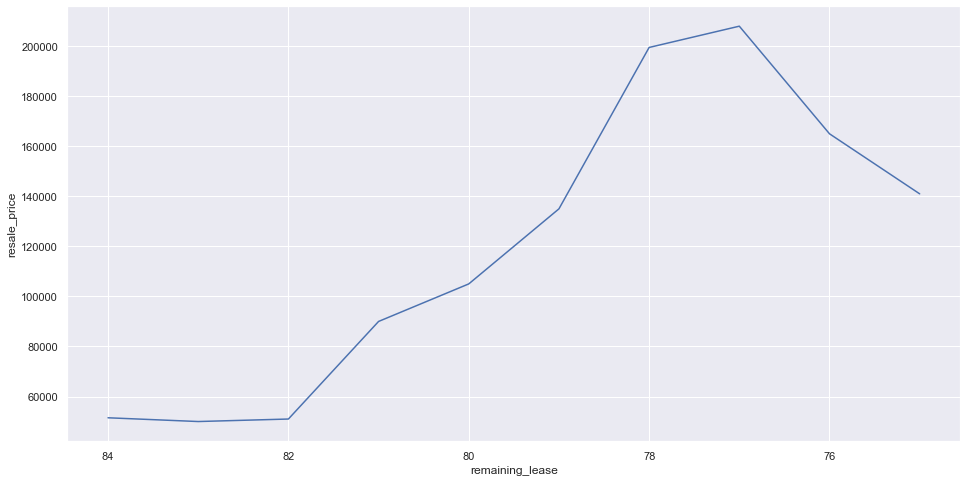

In [166]:
f = plt.figure(figsize=(16, 8))
# sb.jointplot(data = c, x = "remaining_lease", y = "resale_price", height = 12)
sb.lineplot(x="remaining_lease", y="resale_price", data=c).invert_xaxis()

In [127]:
b

,remaining_lease
resale_price,
141000.0,75
165000.0,76
208000.0,77
199500.0,78
135000.0,79
105000.0,80
90000.0,81
51000.0,82
50000.0,83


In [130]:
type(b)

pandas.core.frame.DataFrame

In [167]:
b

,year,month,floor_area_sqm,lease_commence_date,resale_price
remaining_lease,,,,,
75,1999.0,6.0,87.0,1975.0,141000.0
76,1998.0,6.0,87.0,1975.0,165000.0
77,1997.0,7.0,87.0,1975.0,208000.0
78,1996.0,7.0,87.0,1975.0,199500.0
79,1995.0,7.0,87.0,1975.0,135000.0
80,1994.0,4.5,87.0,1975.0,105000.0
81,1993.0,10.0,87.0,1975.0,90000.0
82,1992.0,10.0,87.0,1975.0,51000.0
83,1991.0,8.0,87.0,1975.0,50000.0


In [ ]:
g.get_group((list(g.groups)[0])).groupby(['col3','col4'])['col5'].sum()

In [194]:
g.iloc[0].name

('JURONG WEST', '217', 'BOON LAY AVE', 87.0, 'IMPROVED', 1975)

In [144]:
c = pd.DataFrame({"remaining_lease":list(b.index), "resale_price": list(b.resale_price)})

In [134]:
type(b.index)

pandas.core.indexes.numeric.Int64Index

In [140]:
list(b.index)

[75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

In [141]:
list(b.resale_price)

[141000.0,
 165000.0,
 208000.0,
 199500.0,
 135000.0,
 105000.0,
 90000.0,
 51000.0,
 50000.0,
 51500.0]

In [164]:
c.sort_values("remaining_lease", ascending=True)

,remaining_lease,resale_price
0,75,141000.0
1,76,165000.0
2,77,208000.0
3,78,199500.0
4,79,135000.0
5,80,105000.0
6,81,90000.0
7,82,51000.0
8,83,50000.0
9,84,51500.0
